In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [2]:
import sys
sys.path.append("../")
import ouroboros as ob
from ouroboros import sofb_data_reader as sdr

In [3]:
data_folder = '/data/staff/kits/miccas/ML for the machine/validate'
pl = sdr.get_pathlist(data_folder)
table = sdr.get_megatable(pl)


In [4]:
chains = sdr.split_into_chains(table, hist_len=10)

In [5]:
lchain = max(chains,key=len)

In [6]:
len(lchain)

990

In [7]:
lchain.head()


sen_0    sen_1  sen_2   sen_3  sen_4  sen_5     sen_6  sen_7  sen_8  \
3961  974.0 -12247.0  871.0 -1512.0 -737.0   -4.0  190301.0  421.0 -577.0   
3962 -294.0 -12269.0  775.0  -816.0  343.0  178.0  190364.0 -144.0 -235.0   
3963 -239.0 -12120.0  192.0 -1123.0  -90.0   15.0  190412.0 -388.0  274.0   
3964  159.0 -12231.0  857.0 -1027.0 -226.0 -129.0  190544.0 -206.0  221.0   
3965  109.0 -12138.0  552.0 -1371.0 -388.0  -79.0  190322.0  -47.0   23.0   

      sen_9  ...    act_24    act_25    act_26    act_27    act_28    act_29  \
3961  272.0  ... -0.000639 -0.016736  0.004266  0.002181 -0.001821  0.000891   
3962  -40.0  ... -0.000557 -0.025099 -0.006706  0.002376  0.009383 -0.012376   
3963  435.0  ...  0.000594 -0.025761 -0.005032 -0.000968  0.003951  0.013110   
3964  252.0  ...  0.003505  0.005229 -0.019182 -0.000793  0.018314 -0.005275   
3965  619.0  ...  0.001218  0.010221  0.002903 -0.000347 -0.003297  0.005764   

        act_30    act_31    act_32    act_33  
3961 -0.000058 -0.000960  0.002356  0.006882  
3962 -0.002311  0.009748 -0.002208 -0.002303  
3963 -0.000837 -0.014092  0.011715 -0.015837  
3964 -0.000558  0.004645 -0.004049  0.001854  
3965  0.001426 -0.004140  0.005702 -0.004632  

[5 rows x 69 columns]

In [8]:
lchain.columns

Index(['sen_0', 'sen_1', 'sen_2', 'sen_3', 'sen_4', 'sen_5', 'sen_6', 'sen_7',
       'sen_8', 'sen_9', 'sen_10', 'sen_11', 'sen_12', 'sen_13', 'sen_14',
       'sen_15', 'sen_16', 'sen_17', 'sen_18', 'sen_19', 'sen_20', 'sen_21',
       'sen_22', 'sen_23', 'sen_24', 'sen_25', 'sen_26', 'sen_27', 'sen_28',
       'sen_29', 'sen_30', 'sen_31', 'sen_32', 'sen_33', 'sen_34', 'act_0',
       'act_1', 'act_2', 'act_3', 'act_4', 'act_5', 'act_6', 'act_7', 'act_8',
       'act_9', 'act_10', 'act_11', 'act_12', 'act_13', 'act_14', 'act_15',
       'act_16', 'act_17', 'act_18', 'act_19', 'act_20', 'act_21', 'act_22',
       'act_23', 'act_24', 'act_25', 'act_26', 'act_27', 'act_28', 'act_29',
       'act_30', 'act_31', 'act_32', 'act_33'],
      dtype='object')

In [9]:
# diff_mat_1 = [ x^i_2 − x^i_1 ]

# x^i_T = (lchain.sen_0.iloc[T], ...., lchain.sen_34.iloc[T] )
# x^i_T = lchain[sdr.prefixcols(lchain,'sen_')].iloc[T]

# diff_mat_1 = umat_1 * B_1

# umat_1 = diff_mat_1 * inv(B_1) = kicks

# umat_1 = u^1_1, ... u^n_1 = chain[sdr.prefixcols(chain,'act_')].iloc[T].to_numpy()





In [10]:
def u_vector(chain, T) :
    return chain[sdr.prefixcols(chain,'act_')].iloc[T].to_numpy()

umat_1 = u_vector(lchain, 1)
umat_1

array([ 0.01843984, -0.01766652,  0.00070629,  0.01003175, -0.01221343,
       -0.0025612 ,  0.0002104 ,  0.00281856,  0.00853088, -0.00802325,
        0.00749359, -0.01518942,  0.00207073,  0.00859175, -0.00496058,
        0.03062665, -0.05487894,  0.00975651,  0.00307782, -0.00631729,
        0.02172261, -0.02084274,  0.00952166,  0.02462753, -0.00055684,
       -0.02509923, -0.0067058 ,  0.00237597,  0.00938308, -0.01237613,
       -0.00231117,  0.00974758, -0.00220818, -0.00230271], dtype=float32)

In [11]:
def x_vector(chain, T) :
    return chain[sdr.prefixcols(chain,'sen_')].iloc[T].to_numpy()

x_1 = u_vector(lchain, 1)
x_1

array([ 0.01843984, -0.01766652,  0.00070629,  0.01003175, -0.01221343,
       -0.0025612 ,  0.0002104 ,  0.00281856,  0.00853088, -0.00802325,
        0.00749359, -0.01518942,  0.00207073,  0.00859175, -0.00496058,
        0.03062665, -0.05487894,  0.00975651,  0.00307782, -0.00631729,
        0.02172261, -0.02084274,  0.00952166,  0.02462753, -0.00055684,
       -0.02509923, -0.0067058 ,  0.00237597,  0.00938308, -0.01237613,
       -0.00231117,  0.00974758, -0.00220818, -0.00230271], dtype=float32)

In [12]:
def mat_plot(mat):
    plt.imshow(np.abs(mat), norm = LogNorm())
    plt.colorbar()
    plt.show()

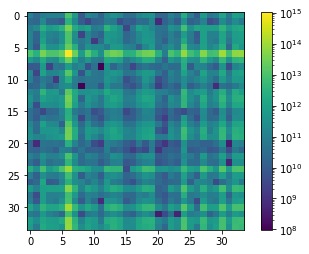

In [13]:
pinv_1 = np.outer(umat_1,umat_1)

pmat_1 = np.linalg.pinv(pinv_1)
mat_plot(pmat_1)

In [14]:
def pmat_next(pmat_T,u_next) :
    
    num = pmat_T.dot( np.outer(u_next, u_next).dot( pmat_T) )
    # num_alt =  np.outer(pmat_T.dot(u_next), u_next.dot( pmat_T) )
    # 
    # display('num',num)
    # display('num_alt',num_alt)
    # display('num-num_alt',num-num_alt)
    
    den = 1 + u_next.dot( pmat_T.dot(u_next) )
    
    # display('pmat_T',pmat_T)
    # display('num',num)
    # display('den',den)
    
    res = pmat_T - ( num / den )
    # display('diff',res - pmat_T)
    
    return res
    

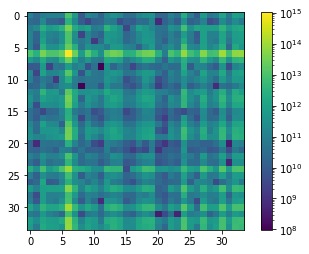

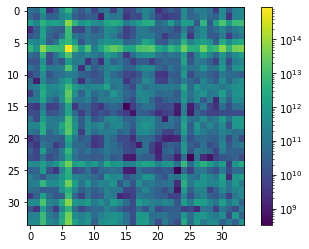

In [15]:
uvec_2 = u_vector(lchain, 2)


pmat_2 = pmat_next(pmat_1,uvec_2)
mat_plot(pmat_1)
mat_plot(pmat_2)

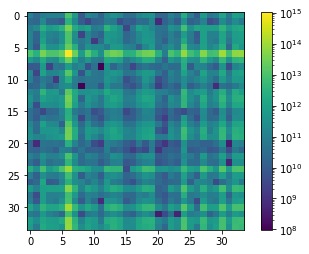

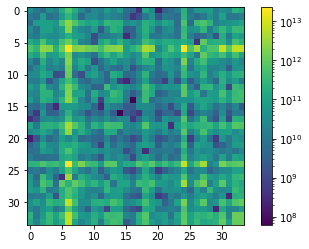

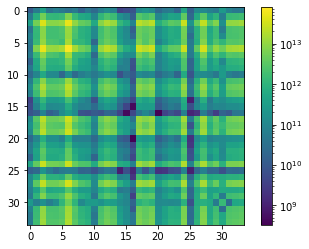

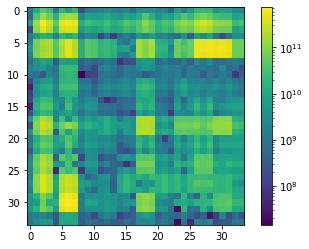

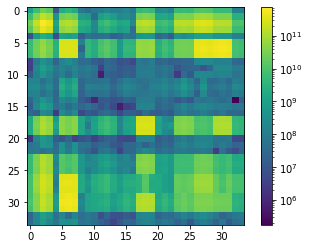

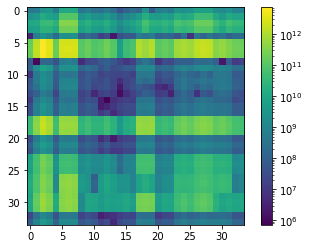

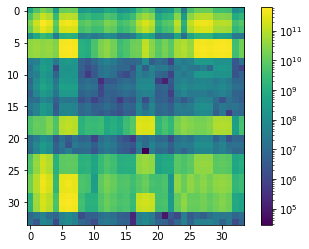

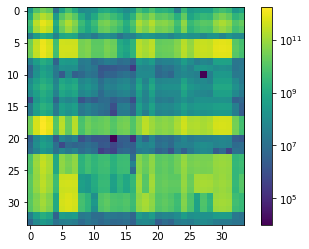

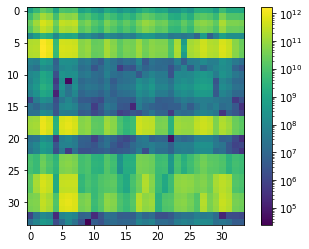

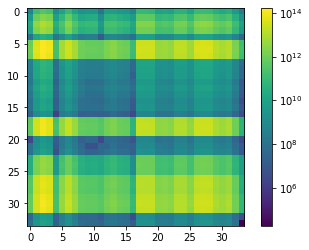

In [17]:
pmat_i = pmat_1
mat_plot(pmat_i)
for i in range(2,100):
    uvec_i = u_vector(lchain, i)
    pmat_i = pmat_next(pmat_i,uvec_i)
    if i%10 == 0 : 
        mat_plot(pmat_i)

In [24]:
def bmat_next(bmat_T, pmat_T, u_next, x_next, x_next2) :
    
    m_next = x_next2 - x_next
    v1 = m_next - bmat_T.dot(u_next)
    v2 = u_next.dot( pmat_T)
    
    num = np.outer(v1, v2) 
    den = 1 + u_next.dot( pmat_T.dot(u_next) )
    
    res = bmat_T + ( num / den ) 
    
    return res 

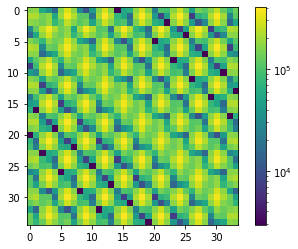

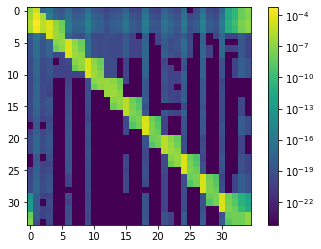

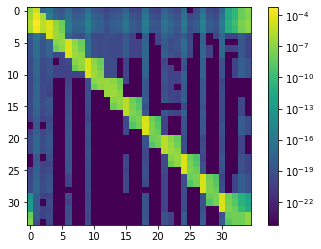

In [27]:

pmat_i = pmat_1
bmat_i = np.loadtxt('../mat/R.txt')

mat_plot(np.loadtxt('../mat/R.txt'))
mat_plot(np.loadtxt('../mat/Rinv.txt'))
mat_plot(np.loadtxt('../mat/RinvW.txt'))


In [29]:
steps = 100

bmats = []

for i in range(2,steps):
    uvec_i = u_vector(lchain, i)
    pmat_i = pmat_next(pmat_i,uvec_i)
    # mat_plot(pmat_i)
    
    u_next = u_vector(lchain, i+1)
    x_next = x_vector(lchain, i+1)
    x_next2 = x_vector(lchain, i+2)
    
    bmat_i = bmat_next(bmat_i, pmat_i, u_next, x_next, x_next2)
    # mat_plot(bmat_i)
    bmats.append(bmat_i)

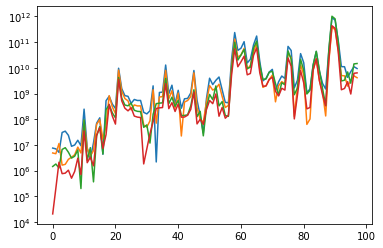

In [38]:
bmatsa = np.abs(np.array(bmats))

plt.plot(bmatsa[:,9,12])
plt.plot(bmatsa[:,8,12])
plt.plot(bmatsa[:,9,11])
plt.plot(bmatsa[:,8,11])

plt.yscale('symlog')

In [27]:
v = np.array([1,2,3,5])
m = np.outer(v,v)
m*1E-3

array([[0.001, 0.002, 0.003, 0.005],
       [0.002, 0.004, 0.006, 0.01 ],
       [0.003, 0.006, 0.009, 0.015],
       [0.005, 0.01 , 0.015, 0.025]])

In [40]:
np.linalg.pinv(m*1E-6)

array([[  657.46219592,  1314.92439185,  1972.38658777,  3287.31097962],
       [ 1314.92439185,  2629.84878369,  3944.77317554,  6574.62195924],
       [ 1972.38658777,  3944.77317554,  5917.15976331,  9861.93293886],
       [ 3287.31097962,  6574.62195924,  9861.93293886, 16436.55489809]])